## Model Meaningful statistics

In [21]:
import os
import pandas as pd
import requests
import matplotlib.pyplot as plt

### Model PlotDrawer

In [26]:
class PlotDrawer:
    """
    A utility class for drawing and saving plots based on DataFrame columns.

    Methods:
    - draw_plots: Draw plots for comparing different columns in the DataFrame.
    - save_plot: Save a Matplotlib figure to a specified folder with a given filename.
    """
    @staticmethod
    def draw_plots(df: pd.DataFrame) -> plt.Figure:
        """
        Draw plots for comparing different columns in the DataFrame.

        Parameters:
        - df (pd.DataFrame): Input DataFrame with columns for plotting.

        Returns:
        plt.Figure: Matplotlib figure containing the drawn plot.
        """

        fig, ax = plt.subplots(figsize=(10, 6))
        ax.scatter(df["gt_corners"], df["rb_corners"])
        ax.set_title("Ground Truth vs Model Corners")
        ax.set_xlabel("Ground Truth Corners")
        ax.set_ylabel("Model Corners")
        plt.show()

        return fig

    @staticmethod
    def save_plot(figure: plt.Figure, save_folder: str, filename: str) -> str:
        """
        Save a Matplotlib figure to a specified folder with a given filename.
    
        Parameters:
        - figure (plt.Figure): Matplotlib figure to be saved.
        - save_folder (str): Folder to save the plot.
        - filename (str): Desired filename for the saved plot.
    
        Returns:
        str: Path to the saved plot.
        """
        os.makedirs(save_folder, exist_ok=True)
        plot_path = os.path.join(save_folder, filename)
        figure.savefig(plot_path)
        return plot_path

### Get pandas data

In [27]:
url = "https://ai-process-sandy.s3.eu-west-1.amazonaws.com/purge/deviation.json"
response = requests.get(url)

In [28]:
with open("deviation.json", "wb") as f:
    f.write(response.content)

In [29]:
df = pd.read_json("deviation.json")

#### Visualize statistic

In [30]:
drawer = PlotDrawer()

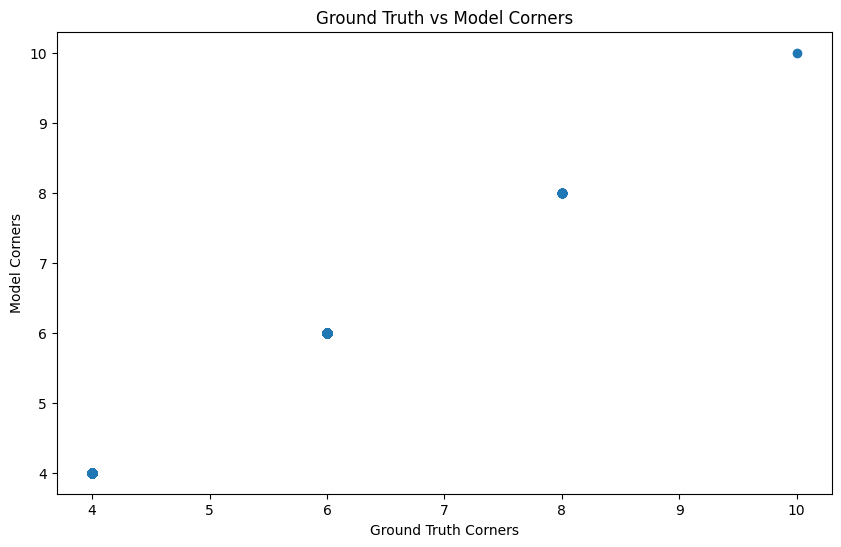

In [31]:
figure = drawer.draw_plots(df)

In [32]:
drawer.save_plot(figure, "plots", "ground_truth_vs_model.png")

'plots/ground_truth_vs_model.png'